In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sxs
import qnmfits

### The `sxs` package lets us easily load SXS waveforms:

In [2]:
h = sxs.load('SXS:BBH:0305/Lev/rhOverM', extrapolation_order=2)
type(h)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


sxs.waveforms.waveform_modes.WaveformModes

In [3]:
import scri

In [4]:
h = scri.WaveformModes(
    dataType = scri.h,
    t = h.time,
    data = h.data,
    ell_min = h.ell_min,
    ell_max = h.ell_max,
    frameType = scri.Inertial,
    r_is_scaled_out = True,
    m_is_scaled_out = True,
    )

type(h)

scri.waveform_modes.WaveformModes

The returned object is already a `WaveformModes` object, which has lots of handy methods (see the `scri` documentation [here](https://scri.readthedocs.io/en/latest/_autosummary/scri.html#scri.WaveformModes)).

In [5]:
# Shift the time array of the WaveformModes object so that zero is at the peak
h.t -= h.max_norm_time()

In [6]:
# We can also easily load metadata associated with the simulation
metadata = sxs.load('SXS:BBH:0305/Lev/metadata.json')

Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json


In [7]:
M = metadata.remnant_mass
chi = np.linalg.norm(metadata.remnant_dimensionless_spin)

### Perform a seven overtone fit to the $h_{22}$ mode using the `qnmfits` package:

In [19]:
qnms = [(2,2,n,1) for n in range(0+1)]
t_0 = 0

best_fit = qnmfits.fit(
    h,
    qnms,
    M,
    chi,
    t_0=t_0,
    spherical_modes=[(2,2),(3,2)]
)

In [20]:
best_fit

{(2, 2, 0, 1): (0.45490846572169924+0.1894263201523226j)}

In [21]:
qnms

[(2, 2, 0, 1)]

In [22]:
t0_array = np.linspace(0, 100, 100)

A220_list = []

for t_0 in t0_array:
    best_fit = qnmfits.fit(
        h,
        qnms,
        M,
        chi,
        t_0=t_0,
        spherical_modes=[(2,2)]
    )
    A220_list.append(best_fit[(2,2,0,1)])

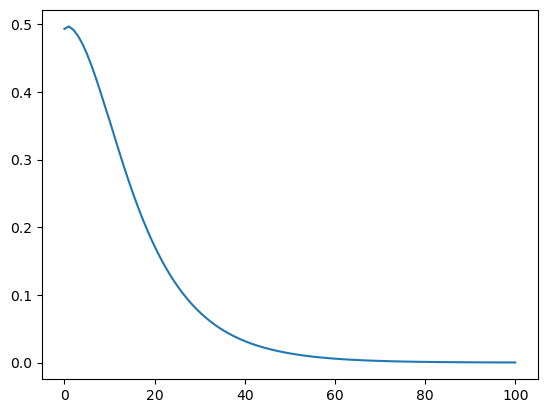

In [23]:
fig, ax = plt.subplots()

ax.plot(t0_array, np.abs(A220_list))

In [24]:
t0_array = np.linspace(0, 100, 100)

A220_list = []

for t_0 in t0_array:
    best_fit = qnmfits.fit(
        h,
        qnms,
        M,
        chi,
        t_0=t_0,
        t_ref = 0,
        spherical_modes=[(2,2)]
    )
    A220_list.append(best_fit[(2,2,0,1)])

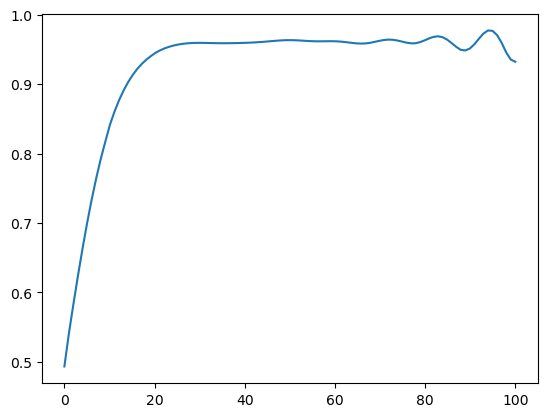

In [28]:
fig, ax = plt.subplots()

ax.plot(t0_array, np.abs(A220_list))

# x.set_ylim(0.9,1)